# Importing Dependencies

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



# Reading the Data

In [429]:
df = pd.read_csv("dataFiles/TATASTEEL_cleaned.csv")

# Basic Data Cleaning

In [430]:
df = df[['Date','Open','Close']]
df['Date'] = pd.to_datetime(df['Date'], utc = True)
df.info()
df['IntradayReturn'] = np.log(df['Close'] / df['Open'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    7383 non-null   datetime64[ns, UTC]
 1   Open    7383 non-null   float64            
 2   Close   7383 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 173.2 KB


In [431]:
# df = df.set_index('Date')
print(df.head())

# df.dropna(inplace=True)
# df.shape

                       Date      Open     Close  IntradayReturn
0 1995-12-31 18:30:00+00:00  2.434930  2.437989        0.001255
1 1996-01-01 18:30:00+00:00  2.434930  2.392717       -0.017489
2 1996-01-02 18:30:00+00:00  2.392716  2.393328        0.000256
3 1996-01-03 18:30:00+00:00  2.355398  2.317467       -0.016235
4 1996-01-04 18:30:00+00:00  2.289325  2.271582       -0.007780


# Calculating Return

In [432]:
df['LogClose'] = np.log(df['Close']) 

df['Return'] =  df['Close'] - df['Open'] 
# df['LogReturn'] = np.log(df['Return']) 

df.head()
df3 = df.tail(6000)

In [433]:
# df2 = df2.set_index('Date')
# df3 = df2.resample('ME').last()
# df3 = df2

In [434]:
df3.head()

,Date,Open,Close,IntradayReturn,LogClose,Return
1383,2001-04-18 18:30:00+00:00,1.747779,1.818164,0.039481,0.597827,0.070385
1384,2001-04-19 18:30:00+00:00,1.827373,1.762251,-0.036288,0.566592,-0.065122
1385,2001-04-22 18:30:00+00:00,1.774749,1.781327,0.003700,0.577359,0.006578
1386,2001-04-23 18:30:00+00:00,1.762909,1.778038,0.008546,0.575511,0.015130
1387,2001-04-24 18:30:00+00:00,1.801062,1.922097,0.065041,0.653417,0.121035


In [444]:
df3.tail()

,Date,Open,Close,IntradayReturn,LogClose,Return
7378,2025-05-20 18:30:00+00:00,159.449997,161.639999,0.013641,5.085372,2.190002
7379,2025-05-21 18:30:00+00:00,160.979996,161.289993,0.001924,5.083204,0.309998
7380,2025-05-22 18:30:00+00:00,161.600006,162.970001,0.008442,5.093566,1.369995
7381,2025-05-25 18:30:00+00:00,163.100006,162.509995,-0.003624,5.090740,-0.590012
7382,2025-05-26 18:30:00+00:00,162.509995,163.160004,0.003992,5.094731,0.650009


# Plots over time


<Axes: xlabel='Date', ylabel='Return'>

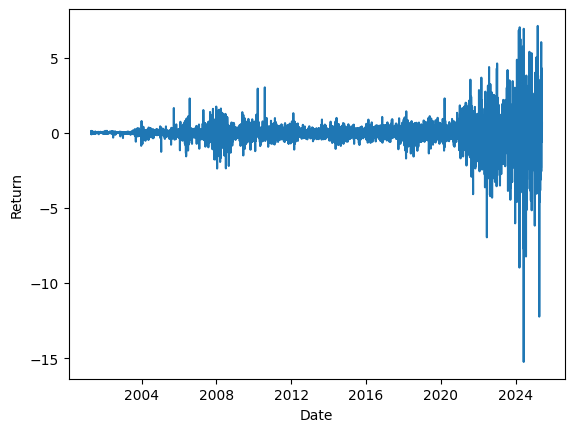

In [435]:
sns.lineplot(data = df3, x = "Date", y = "Return")

<Axes: xlabel='Date', ylabel='IntradayReturn'>

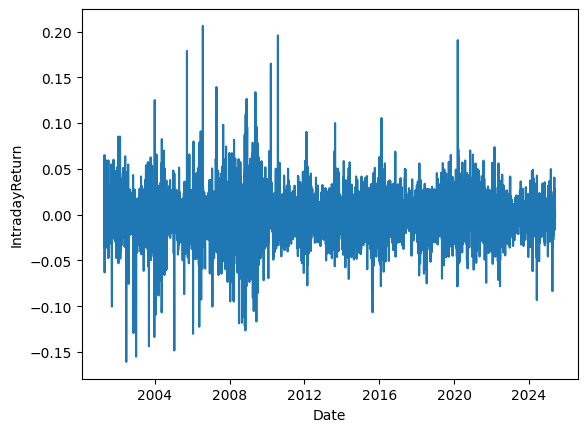

In [436]:
sns.lineplot(data=df3, x="Date", y="IntradayReturn")

<Axes: xlabel='Date', ylabel='Close'>

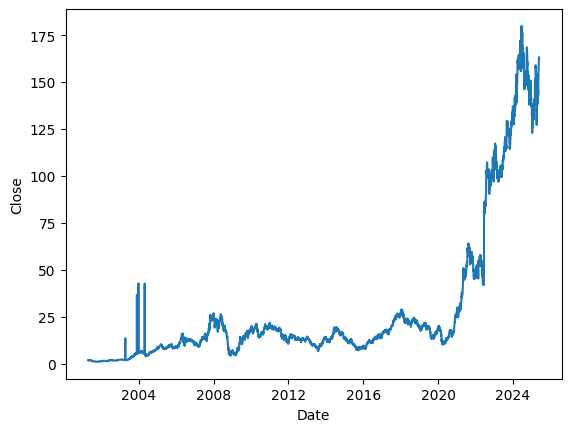

In [437]:
sns.lineplot(data=df3, x="Date", y="Close")

<Axes: xlabel='Date', ylabel='LogClose'>

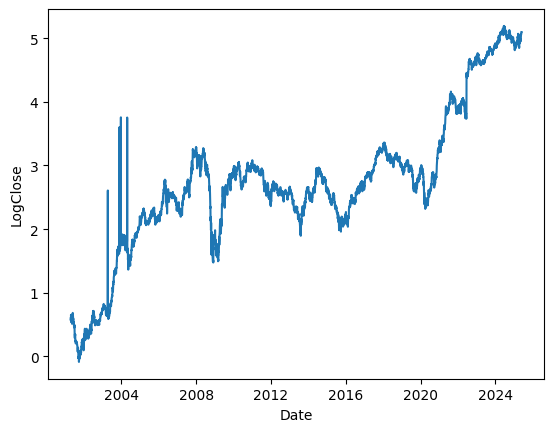

In [438]:
sns.lineplot(data=df3, x="Date", y="LogClose")

# ACF and PACF

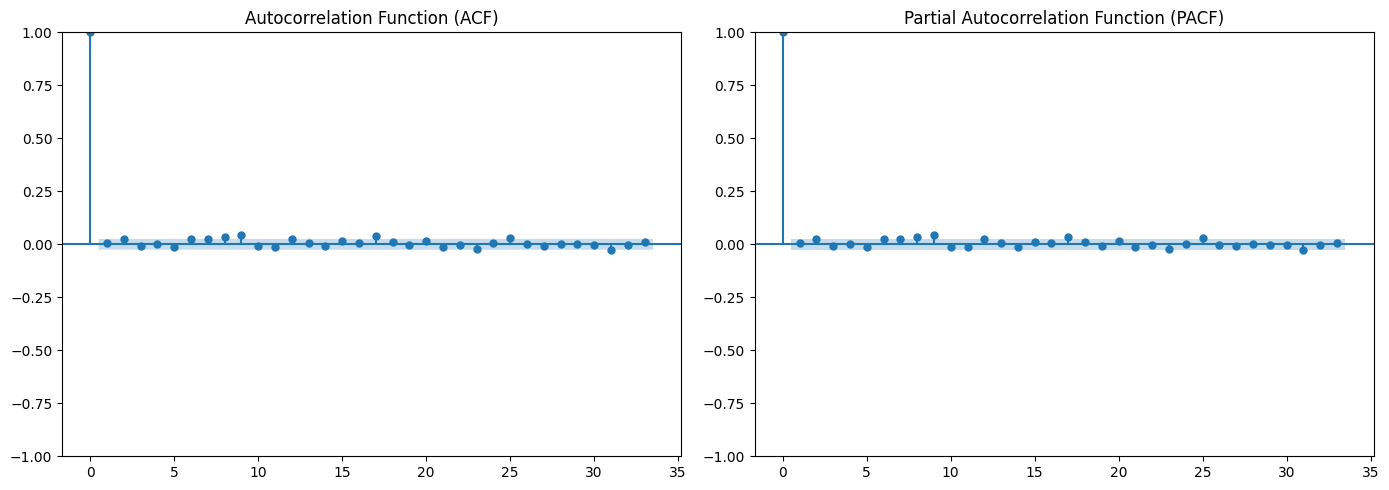

In [439]:
from statsmodels.graphics.tsaplots import plot_pacf
series = df3['IntradayReturn'].dropna()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(series, lags=33, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(series, lags=33, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Decomposition

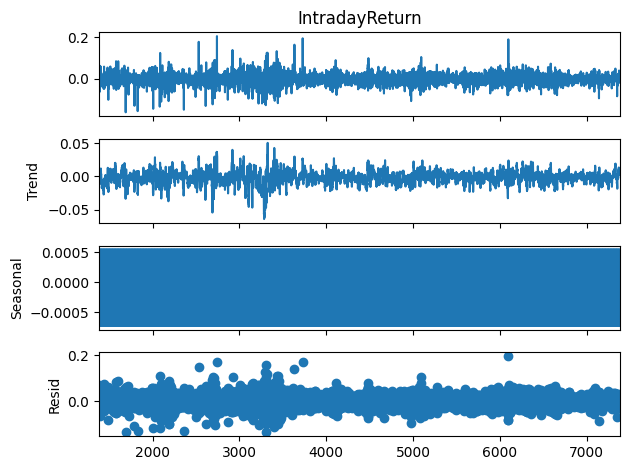

In [440]:
decomposition = seasonal_decompose(df3["IntradayReturn"], model="additive", period=7)
decomposition.plot()
plt.show()

# Augmented Dickey Fuller

In [441]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: 2.4003969141539443
p-value: 0.9990104962897183
Used lags: 30
Number of observations: 7352
Critical Values:
   1%: -3.4312397694039465
   5%: -2.861933209553657
   10%: -2.5669793011524624


In [442]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['IntradayReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -22.66166143400944
p-value: 0.0
Used lags: 11
Number of observations: 7371
Critical Values:
   1%: -3.4312374750732526
   5%: -2.8619321957875727
   10%: -2.5669787615097066


The p-value is 0.0 (much less than 0.05).
Thus series is stationary.

In [443]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Return'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -12.832355433539096
p-value: 5.8370922209468555e-24
Used lags: 33
Number of observations: 7349
Critical Values:
   1%: -3.4312401327515385
   5%: -2.861933370101263
   10%: -2.5669793866143524
